# Capstone Project - The Battle of Neighborhoods

## Part 1: Introduction/Business Problem

New York City's demographics show that it is a large and ethnically diverse metropolis. It is the largest city in the United States with a long history of international immigration. New York City has been a major point of entry for immigrants and as many as 800 languages are spoken in New York. According to the U.S. Census Bureau 2018 American Community Survey 1-Year Estimates, as of 2018, 684,345 U.S. residents identify themselves as being of Peruvian origin. A high concentration of peruvians resides in New York City. Peruvian migrants, in particular, have generally been successful in opening restaurants and creating jobs in New York. Peruvian food is one of the defining characteristics of Peruvian culture and have an special niche in serving distinct flavors and ingredients of each region of the country and the culinary traditions of each. 

This capstone project examines the best locations for Peruvian restaurants in New York City. Intricate and intimate migrant networks have developed over the years between New York City and specific communities in Peru. As family members and friends from these communities move back and forth between the two countries, they facilitate the flow of information. Nevertheless, like any other business, opening a new restaurant requires serious considerations and is more complicated than it seems at first. Location influences the success or failure of a restaurant in a host of ways, from attracting enough initial customer interest to being convenient to visit. 

The objective of this capstone project is to analyze and select the best locations in New York City to open a new Peruvian restaurant by analyzing and visualizing data. The project is particularly useful to new Peruvian migrants looking to open and invest on new restaurant in New York City. New York City was home to over 8.3 million people in 2019 and keeps growing as diverse city in terms of culture and food offering.  

## Part 2: Data

To accomplish this capstone project, it is required the following data from New York City:

1.New York City data related to neighborhoods and boroughs.

2.Neighborhoods latitude and longitude coordinates required for mapping plot and obtain venue data.

3.Venue data related to existing restaurants in New York City for further analysis of neighborhoods.

New York City data related to neighborhoods and boroughs can be obtained from the open data source (https://cocl.us/new_york_dataset) and geographical coordinates of neighborhoods, such as latitude and longitude, from Python Geocoder package. Foursquare API will be necessary to obtain venue data of New York City neighborhoods. Currently Foursquare's database contains more than 105 million places including venue data such as Peruvian restaurants in New York City.

The capstone project will show how to convert addresses into their equivalent latitude and longitude values. Also, how to use the Foursquare API to explore neighborhoods in New York City, use the explore function to get the most common venue categories in each neighborhood. Finally, the importance of using Folium library to visualize the neighborhoods in New York City. 

## Part 3: Methodology

For this capstone project the methodolgy will be the following:

1.Data will be obtained from from the open data source (https://cocl.us/new_york_dataset) and cleaned/processed into a dataframe.

2.Foursquare will be used to for venue data and filtered by Peruvian restaurants (ratings, tips, and likes by users will be counted and added to the dataframe).

3.Data will be sorted based on rankings.

4.Data be will be visualized using Python Folium library.

### Preparation - Downloading and importing all required libraries

In [6]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json # library to handle JSON files
#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans
#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
!pip install folium
import folium # map rendering library
import urllib
import seaborn as sns
from matplotlib import pyplot as plt
print('Libraries imported.')

     |████████████████████████████████| 93 kB 4.0 MB/s  eta 0:00:01
Libraries imported.


### Credentials

In [7]:
CLIENT_ID = 'UCJFR4YSRIAM1W545ZZM1DJOIMLXOKLLVS35VTZMRWZHBKIP' # your Foursquare ID
CLIENT_SECRET = 'VOIO44FSXYQBCZWRD25SMIMMPTWQHXRVG40RQNUBCF4NV1VE' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Credentials:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Credentials:
CLIENT_ID: UCJFR4YSRIAM1W545ZZM1DJOIMLXOKLLVS35VTZMRWZHBKIP
CLIENT_SECRET:VOIO44FSXYQBCZWRD25SMIMMPTWQHXRVG40RQNUBCF4NV1VE


### Functions to repeat the same process to all the neighborhoods in New York City

In [8]:
def geo_location(address):
    # get geo location of address
    geolocator = Nominatim(user_agent="foursquare_agent")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return latitude,longitude


def get_venues(lat,lng):
    #set variables
    radius=400
    LIMIT=100
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    # get all the data
    results = requests.get(url).json()
    venue_data=results['response']['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df


def get_venue_details(venue_id):
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    # get all the data
    results = requests.get(url).json()
    print(results)
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df


def get_new_york_data():
    url='https://cocl.us/new_york_dataset'
    resp=requests.get(url).json()
    # all data is present in features label
    features=resp['features']
    # define the dataframe columns
    column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
    # instantiate the dataframe
    new_york_data = pd.DataFrame(columns=column_names)
    for data in features:
        borough = data['properties']['borough'] 
        neighborhood_name = data['properties']['name']
        neighborhood_latlon = data['geometry']['coordinates']
        neighborhood_lat = neighborhood_latlon[1]
        neighborhood_lon = neighborhood_latlon[0]
        new_york_data = new_york_data.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
    return new_york_data

### New York City neighborhoods and boroughs data

In [9]:
ny_data = get_new_york_data()
ny_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [10]:
ny_data.shape

(306, 4)

There are total of 306 different neighborhoods in New York City.

### Data Analysis of New York City neighborhoods and boroughs

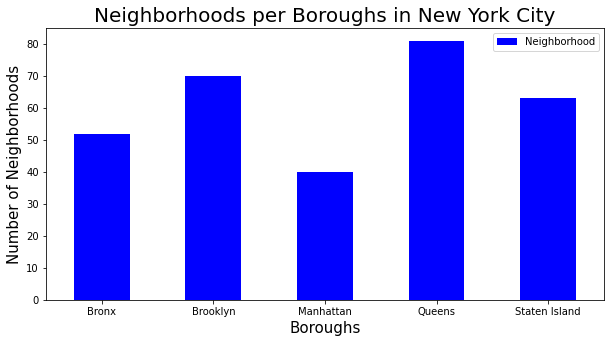

In [15]:
clr = "blue"
ny_data.groupby('Borough')['Neighborhood'].count().plot.bar(figsize=(10,5), color=clr)
plt.title('Neighborhoods per Boroughs in New York City', fontsize = 20)
plt.xlabel('Boroughs', fontsize = 15)
plt.ylabel('Number of Neighborhoods',fontsize = 15)
plt.xticks(rotation = 'horizontal')
plt.legend()
plt.show()

According to graph Queens is the borough in New York City with more number of neighborhoods.

### Peruvian restaurants that are in each neighborhood and borough in New York City

In [27]:
# preparing neighborhood list that contains peruvian restaurants
column_names=['Borough', 'Neighborhood', 'ID','Name']
peruvian_rest_ny=pd.DataFrame(columns=column_names)
count=1
for row in ny_data.values.tolist():
    Borough, Neighborhood, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude)
    peruvian_restaurants=venues[venues['Category']=='Peruvian Restaurant']   
    print('(',count,'/',len(ny_data),')','Peruvian Restaurants in '+Neighborhood+', '+Borough+':'+str(len(peruvian_restaurants)))
    print(row)
    for resturant_detail in peruvian_restaurants.values.tolist():
        id, name , category=resturant_detail
        peruvian_rest_ny = peruvian_rest_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    count+=1

( 1 / 306 ) Peruvian Restaurants in Wakefield, Bronx:0
['Bronx', 'Wakefield', 40.89470517661, -73.84720052054902]
( 2 / 306 ) Peruvian Restaurants in Co-op City, Bronx:0
['Bronx', 'Co-op City', 40.87429419303012, -73.82993910812398]
( 3 / 306 ) Peruvian Restaurants in Eastchester, Bronx:0
['Bronx', 'Eastchester', 40.887555677350775, -73.82780644716412]
( 4 / 306 ) Peruvian Restaurants in Fieldston, Bronx:0
['Bronx', 'Fieldston', 40.89543742690383, -73.90564259591682]
( 5 / 306 ) Peruvian Restaurants in Riverdale, Bronx:0
['Bronx', 'Riverdale', 40.890834493891305, -73.9125854610857]
( 6 / 306 ) Peruvian Restaurants in Kingsbridge, Bronx:0
['Bronx', 'Kingsbridge', 40.88168737120521, -73.90281798724604]
( 7 / 306 ) Peruvian Restaurants in Marble Hill, Manhattan:0
['Manhattan', 'Marble Hill', 40.87655077879964, -73.91065965862981]
( 8 / 306 ) Peruvian Restaurants in Woodlawn, Bronx:0
['Bronx', 'Woodlawn', 40.89827261213805, -73.86731496814176]
( 9 / 306 ) Peruvian Restaurants in Norwood, B

( 67 / 306 ) Peruvian Restaurants in Carroll Gardens, Brooklyn:0
['Brooklyn', 'Carroll Gardens', 40.680540231076485, -73.99465372828006]
( 68 / 306 ) Peruvian Restaurants in Red Hook, Brooklyn:0
['Brooklyn', 'Red Hook', 40.676253230250886, -74.0127589747356]
( 69 / 306 ) Peruvian Restaurants in Gowanus, Brooklyn:0
['Brooklyn', 'Gowanus', 40.673931143187154, -73.99444087145339]
( 70 / 306 ) Peruvian Restaurants in Fort Greene, Brooklyn:0
['Brooklyn', 'Fort Greene', 40.68852726018977, -73.97290574369092]
( 71 / 306 ) Peruvian Restaurants in Park Slope, Brooklyn:0
['Brooklyn', 'Park Slope', 40.67232052268197, -73.97705030183924]
( 72 / 306 ) Peruvian Restaurants in Cypress Hills, Brooklyn:0
['Brooklyn', 'Cypress Hills', 40.68239101144211, -73.87661596457296]
( 73 / 306 ) Peruvian Restaurants in East New York, Brooklyn:0
['Brooklyn', 'East New York', 40.669925700847045, -73.88069863917366]
( 74 / 306 ) Peruvian Restaurants in Starrett City, Brooklyn:0
['Brooklyn', 'Starrett City', 40.64758

( 130 / 306 ) Peruvian Restaurants in Astoria, Queens:0
['Queens', 'Astoria', 40.76850859335492, -73.91565374304234]
( 131 / 306 ) Peruvian Restaurants in Woodside, Queens:0
['Queens', 'Woodside', 40.74634908860222, -73.90184166838284]
( 132 / 306 ) Peruvian Restaurants in Jackson Heights, Queens:2
['Queens', 'Jackson Heights', 40.75198138007367, -73.88282109164365]
( 133 / 306 ) Peruvian Restaurants in Elmhurst, Queens:0
['Queens', 'Elmhurst', 40.744048505122024, -73.88165622288388]
( 134 / 306 ) Peruvian Restaurants in Howard Beach, Queens:0
['Queens', 'Howard Beach', 40.65422527738487, -73.8381376460028]
( 135 / 306 ) Peruvian Restaurants in Corona, Queens:0
['Queens', 'Corona', 40.74238175015667, -73.85682497345258]
( 136 / 306 ) Peruvian Restaurants in Forest Hills, Queens:0
['Queens', 'Forest Hills', 40.72526378216503, -73.84447500788983]
( 137 / 306 ) Peruvian Restaurants in Kew Gardens, Queens:0
['Queens', 'Kew Gardens', 40.7051790354148, -73.82981905825703]
( 138 / 306 ) Peruv

( 196 / 306 ) Peruvian Restaurants in North Corona, Queens:0
['Queens', 'North Corona', 40.7540709990489, -73.85751790676447]
( 197 / 306 ) Peruvian Restaurants in Forest Hills Gardens, Queens:0
['Queens', 'Forest Hills Gardens', 40.7146110815117, -73.8410221123401]
( 198 / 306 ) Peruvian Restaurants in St. George, Staten Island:0
['Staten Island', 'St. George', 40.6449815710044, -74.07935312512797]
( 199 / 306 ) Peruvian Restaurants in New Brighton, Staten Island:0
['Staten Island', 'New Brighton', 40.64061455913511, -74.08701650516625]
( 200 / 306 ) Peruvian Restaurants in Stapleton, Staten Island:0
['Staten Island', 'Stapleton', 40.62692762538176, -74.07790192660066]
( 201 / 306 ) Peruvian Restaurants in Rosebank, Staten Island:0
['Staten Island', 'Rosebank', 40.61530494652761, -74.06980526716141]
( 202 / 306 ) Peruvian Restaurants in West Brighton, Staten Island:0
['Staten Island', 'West Brighton', 40.63187892654607, -74.1071817826561]
( 203 / 306 ) Peruvian Restaurants in Grymes H

( 256 / 306 ) Peruvian Restaurants in Emerson Hill, Staten Island:0
['Staten Island', 'Emerson Hill', 40.606794394801, -74.09776206972522]
( 257 / 306 ) Peruvian Restaurants in Randall Manor, Staten Island:0
['Staten Island', 'Randall Manor', 40.63563000681151, -74.09805062373887]
( 258 / 306 ) Peruvian Restaurants in Howland Hook, Staten Island:0
['Staten Island', 'Howland Hook', 40.63843283794795, -74.18622331749823]
( 259 / 306 ) Peruvian Restaurants in Elm Park, Staten Island:0
['Staten Island', 'Elm Park', 40.630146741193826, -74.1418167896889]
( 260 / 306 ) Peruvian Restaurants in Remsen Village, Brooklyn:0
['Brooklyn', 'Remsen Village', 40.652117451793494, -73.91665331978048]
( 261 / 306 ) Peruvian Restaurants in New Lots, Brooklyn:0
['Brooklyn', 'New Lots', 40.6627442796966, -73.88511776379292]
( 262 / 306 ) Peruvian Restaurants in Paerdegat Basin, Brooklyn:0
['Brooklyn', 'Paerdegat Basin', 40.63131755039667, -73.90233474295836]
( 263 / 306 ) Peruvian Restaurants in Mill Basin,

In [28]:
# Saving the information so far to a .csv file due to limited calls on FourSquare
peruvian_rest_ny.to_csv('peruvian_rest_ny_tocsv1.csv')

In [52]:
peruvian_ny = pd.read_csv('peruvian_rest_ny_tocsv1.csv')
peruvian_rest_ny

,Borough,Neighborhood,ID,Name
0,Bronx,Mott Haven,4bb28791715eef3b9f5e85bb,Pio Pio
1,Manhattan,Upper West Side,4a7a543df964a5202ee91fe3,Flor de Mayo
2,Manhattan,Clinton,4b1b1f52f964a52074f823e3,Pio Pio
3,Queens,Jackson Heights,4b9ece55f964a520590337e3,Urubamba
4,Queens,Jackson Heights,514cae4ae4b08e5e6fb50538,Don Alex Restaurant
5,Queens,Sunnyside,51ec2df8498ee2a4dc8ee843,Don Pollo II
6,Queens,Rego Park,4ede24237ee5f354d5122374,Don Alex
7,Queens,Rego Park,4b37cf54f964a520924625e3,Cuzco Peru
8,Queens,Little Neck,52d1e8f4498e56474f235066,Lima 33 Restaurant
9,Staten Island,Concord,536eb74e498e9a6b05cc9939,Inca's Grill Peruvian Cuisine


In [31]:
peruvian_rest_ny.shape

(12, 4)

We obtained 12 Peruvian Restaurants across the New York City.

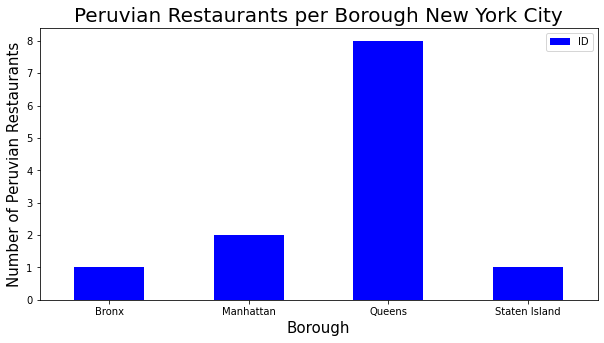

In [35]:
peruvian_rest_ny.groupby('Borough')['ID'].count().plot.bar(figsize=(10,5), color=clr)
plt.title('Peruvian Restaurants per Borough New York City', fontsize = 20)
plt.xlabel('Borough', fontsize = 15)
plt.ylabel('Number of Peruvian Restaurants', fontsize=15)
plt.xticks(rotation = 'horizontal')
plt.legend()
plt.show()

Queens borough has the most number of Peruvian restaurants by far in New York City.

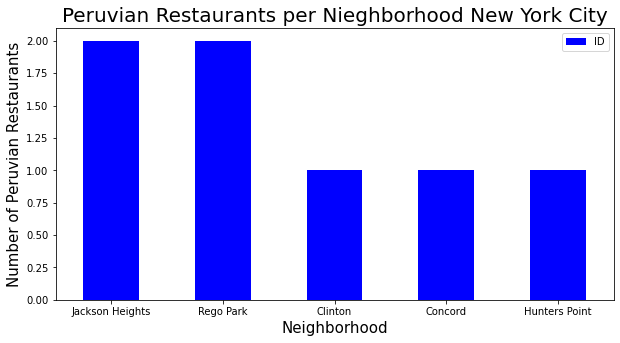

In [38]:
NOofNeigh = 5
peruvian_rest_ny.groupby('Neighborhood')['ID'].count().nlargest(NOofNeigh).plot.bar(figsize=(10,5), color=clr)
plt.title('Peruvian Restaurants per Nieghborhood New York City', fontsize = 20)
plt.xlabel('Neighborhood', fontsize = 15)
plt.ylabel('Number of Peruvian Restaurants', fontsize=15)
plt.xticks(rotation = 'horizontal')
plt.legend()
plt.show()

Jason Heights and Rego Park neighborhood have the double of Peruvian restaurants than other neighborhoods in all New York City and both are located in Queens Borough.

### Ranking of each restaurant for further analysis

In [54]:
column_names=['Borough', 'Neighborhood', 'ID','Name','Likes','Rating','Tips']
peruvian_rest_stats_ny=pd.DataFrame(columns=column_names)
count=1
for row in peruvian_rest_ny.values.tolist():
    Borough,Neighborhood,ID,Name=row
    try:
        venue_details=get_venue_details(ID)
        print(venue_details)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except IndexError:
        print('No data available for id=',ID)
        # we will assign 0 value for these resturants as they may have been 
        #recently opened or details does not exist in FourSquare Database
        id,name,likes,rating,tips=[0]*5
    print('(',count,'/',len(peruvian_rest_ny),')','processed')
    peruvian_rest_stats_ny = peruvian_rest_stats_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index=True)
    count+=1
peruvian_rest_stats_ny

{'meta': {'code': 200, 'requestId': '5fb847cd33f6626c6898a909'}, 'response': {'venue': {'id': '4bb28791715eef3b9f5e85bb', 'name': 'Pio Pio', 'contact': {'phone': '7184013300', 'formattedPhone': '(718) 401-3300'}, 'location': {'address': '264 Cypress Ave', 'crossStreet': 'at E 139th St', 'lat': 40.80604732187535, 'lng': -73.91418540969559, 'labeledLatLngs': [{'label': 'display', 'lat': 40.80604732187535, 'lng': -73.91418540969559}, {'label': 'entrance', 'lat': 40.806015, 'lng': -73.914084}], 'postalCode': '10454', 'cc': 'US', 'neighborhood': 'Mott Haven', 'city': 'Bronx', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['264 Cypress Ave (at E 139th St)', 'Bronx, NY 10454', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/pio-pio/4bb28791715eef3b9f5e85bb', 'categories': [{'id': '4eb1bfa43b7b52c0e1adc2e8', 'name': 'Peruvian Restaurant', 'pluralName': 'Peruvian Restaurants', 'shortName': 'Peruvian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/

{'meta': {'code': 200, 'requestId': '5fb847cdcce9aa16743e494d'}, 'response': {'venue': {'id': '4a7a543df964a5202ee91fe3', 'name': 'Flor de Mayo', 'contact': {'phone': '2127873388', 'formattedPhone': '(212) 787-3388'}, 'location': {'address': '484 Amsterdam Ave', 'crossStreet': 'btwn 83rd & 84th St.', 'lat': 40.785966049770074, 'lng': -73.9763123251348, 'labeledLatLngs': [{'label': 'display', 'lat': 40.785966049770074, 'lng': -73.9763123251348}, {'label': 'entrance', 'lat': 40.786025, 'lng': -73.976433}], 'postalCode': '10024', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['484 Amsterdam Ave (btwn 83rd & 84th St.)', 'New York, NY 10024', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/flor-de-mayo/4a7a543df964a5202ee91fe3', 'categories': [{'id': '4eb1bfa43b7b52c0e1adc2e8', 'name': 'Peruvian Restaurant', 'pluralName': 'Peruvian Restaurants', 'shortName': 'Peruvian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/f

{'meta': {'code': 200, 'requestId': '5fb847cdebf7ed05268445cf'}, 'response': {'venue': {'id': '4b1b1f52f964a52074f823e3', 'name': 'Pio Pio', 'contact': {'phone': '2124592929', 'formattedPhone': '(212) 459-2929'}, 'location': {'address': '604 10th Ave', 'crossStreet': 'btwn W 43rd & W 44th St', 'lat': 40.76063594478618, 'lng': -73.99471374607128, 'labeledLatLngs': [{'label': 'display', 'lat': 40.76063594478618, 'lng': -73.99471374607128}], 'postalCode': '10036', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['604 10th Ave (btwn W 43rd & W 44th St)', 'New York, NY 10036', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/pio-pio/4b1b1f52f964a52074f823e3', 'categories': [{'id': '4eb1bfa43b7b52c0e1adc2e8', 'name': 'Peruvian Restaurant', 'pluralName': 'Peruvian Restaurants', 'shortName': 'Peruvian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/peruvian_', 'suffix': '.png'}, 'primary': True}, {'id': '4bf58dd8d4898

{'meta': {'code': 200, 'requestId': '5fb847ceebf5db5626e02bd5'}, 'response': {'venue': {'id': '4b9ece55f964a520590337e3', 'name': 'Urubamba', 'contact': {'phone': '7186722224', 'formattedPhone': '(718) 672-2224'}, 'location': {'address': '8620 37th Ave', 'lat': 40.75010891043233, 'lng': -73.87970961391699, 'labeledLatLngs': [{'label': 'display', 'lat': 40.75010891043233, 'lng': -73.87970961391699}], 'postalCode': '11372', 'cc': 'US', 'city': 'Jackson Heights', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['8620 37th Ave', 'Jackson Heights, NY 11372', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/urubamba/4b9ece55f964a520590337e3', 'categories': [{'id': '4eb1bfa43b7b52c0e1adc2e8', 'name': 'Peruvian Restaurant', 'pluralName': 'Peruvian Restaurants', 'shortName': 'Peruvian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/peruvian_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 51}, 'price': {'tier': 2, 'me

{'meta': {'code': 200, 'requestId': '5fb847cea5421e17cceadb7c'}, 'response': {'venue': {'id': '514cae4ae4b08e5e6fb50538', 'name': 'Don Alex Restaurant', 'contact': {'phone': '7184245187', 'formattedPhone': '(718) 424-5187'}, 'location': {'address': '85-04 37th Ave', 'crossStreet': '85 Street', 'lat': 40.749881947134114, 'lng': -73.88212120723138, 'labeledLatLngs': [{'label': 'display', 'lat': 40.749881947134114, 'lng': -73.88212120723138}], 'postalCode': '11372', 'cc': 'US', 'city': 'Jackson Heights', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['85-04 37th Ave (85 Street)', 'Jackson Heights, NY 11372', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/don-alex-restaurant/514cae4ae4b08e5e6fb50538', 'categories': [{'id': '4eb1bfa43b7b52c0e1adc2e8', 'name': 'Peruvian Restaurant', 'pluralName': 'Peruvian Restaurants', 'shortName': 'Peruvian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/peruvian_', 'suffix': '.png'}, 'primary': True}], 'ver

{'meta': {'code': 200, 'requestId': '5fb847cff80c210a28c7659e'}, 'response': {'venue': {'id': '4ede24237ee5f354d5122374', 'name': 'Don Alex', 'contact': {'phone': '7182751112', 'formattedPhone': '(718) 275-1112'}, 'location': {'address': '9705 64th Ave', 'crossStreet': 'at Queens Blvd', 'lat': 40.72983122475376, 'lng': -73.86036503864946, 'labeledLatLngs': [{'label': 'display', 'lat': 40.72983122475376, 'lng': -73.86036503864946}], 'postalCode': '11374', 'cc': 'US', 'city': 'Rego Park', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['9705 64th Ave (at Queens Blvd)', 'Rego Park, NY 11374', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/don-alex/4ede24237ee5f354d5122374', 'categories': [{'id': '4eb1bfa43b7b52c0e1adc2e8', 'name': 'Peruvian Restaurant', 'pluralName': 'Peruvian Restaurants', 'shortName': 'Peruvian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/peruvian_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'ti

{'meta': {'code': 200, 'requestId': '5fb847cf526d023dffc49976'}, 'response': {'venue': {'id': '52d1e8f4498e56474f235066', 'name': 'Lima 33 Restaurant', 'contact': {'phone': '7182254949', 'formattedPhone': '(718) 225-4949'}, 'location': {'address': '25404 Northern Blvd', 'lat': 40.77153874601836, 'lng': -73.73473314051039, 'labeledLatLngs': [{'label': 'display', 'lat': 40.77153874601836, 'lng': -73.73473314051039}], 'postalCode': '11362', 'cc': 'US', 'city': 'Little Neck', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['25404 Northern Blvd', 'Little Neck, NY 11362', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/lima-33-restaurant/52d1e8f4498e56474f235066', 'categories': [{'id': '4eb1bfa43b7b52c0e1adc2e8', 'name': 'Peruvian Restaurant', 'pluralName': 'Peruvian Restaurants', 'shortName': 'Peruvian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/peruvian_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 4}, '

{'meta': {'code': 200, 'requestId': '5fb847cf32abda5e08fd0a18'}, 'response': {'venue': {'id': '52b46aec11d2522f8646e332', 'name': 'Jora', 'contact': {'phone': '7183922033', 'formattedPhone': '(718) 392-2033', 'twitter': 'jorarestaurant', 'facebook': '623776691054124', 'facebookUsername': 'jorafoods', 'facebookName': 'Jora Restaurant & Bar'}, 'location': {'address': '47-46 11th St', 'crossStreet': 'at 48th Ave', 'lat': 40.743673955671525, 'lng': -73.95132038287467, 'labeledLatLngs': [{'label': 'display', 'lat': 40.743673955671525, 'lng': -73.95132038287467}], 'postalCode': '11101', 'cc': 'US', 'city': 'Queens', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['47-46 11th St (at 48th Ave)', 'Long Island City, NY 11101', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/jora/52b46aec11d2522f8646e332', 'categories': [{'id': '4eb1bfa43b7b52c0e1adc2e8', 'name': 'Peruvian Restaurant', 'pluralName': 'Peruvian Restaurants', 'shortName': 'Peruvian', 'icon': {'prefix': '

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips
0,Bronx,Mott Haven,4bb28791715eef3b9f5e85bb,Pio Pio,67,8.7,23
1,Manhattan,Upper West Side,4a7a543df964a5202ee91fe3,Flor de Mayo,201,8.3,92
2,Manhattan,Clinton,4b1b1f52f964a52074f823e3,Pio Pio,1125,8.9,330
3,Queens,Jackson Heights,4b9ece55f964a520590337e3,Urubamba,98,8.7,51
4,Queens,Jackson Heights,514cae4ae4b08e5e6fb50538,Don Alex Restaurant,6,7.5,3
5,Queens,Sunnyside,51ec2df8498ee2a4dc8ee843,Don Pollo II,7,7.8,2
6,Queens,Rego Park,4ede24237ee5f354d5122374,Don Alex,25,7.5,13
7,Queens,Rego Park,4b37cf54f964a520924625e3,Cuzco Peru,14,6.8,7
8,Queens,Little Neck,52d1e8f4498e56474f235066,Lima 33 Restaurant,27,8.3,4
9,Staten Island,Concord,536eb74e498e9a6b05cc9939,Inca's Grill Peruvian Cuisine,18,7.5,8


In [55]:
# Continuing to save data to a .csv file
peruvian_rest_stats_ny.to_csv('peruvian_rest_stats_ny_csv.csv') 

In [56]:
peruvian_rest_stats_ny.shape

(12, 7)

We obtained information such as number of likes, ratings, and tips for all 12 Peruvian Restaurants located in New York City. 

Pio Pio restaurant in Clinton Neighborhood in Manhattan has the most number of likes, best rating, and tips among all Peruvian restaurants in the whole city.

In [57]:
peruvian_rest_stats_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Borough       12 non-null     object 
 1   Neighborhood  12 non-null     object 
 2   ID            12 non-null     object 
 3   Name          12 non-null     object 
 4   Likes         12 non-null     object 
 5   Rating        12 non-null     float64
 6   Tips          12 non-null     object 
dtypes: float64(1), object(6)
memory usage: 800.0+ bytes


In [58]:
#Converting string values to float 
peruvian_rest_stats_ny['Likes'] = peruvian_rest_stats_ny['Likes'].astype('float64')
peruvian_rest_stats_ny['Tips'] = peruvian_rest_stats_ny['Tips'].astype('float64')
peruvian_rest_stats_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Borough       12 non-null     object 
 1   Neighborhood  12 non-null     object 
 2   ID            12 non-null     object 
 3   Name          12 non-null     object 
 4   Likes         12 non-null     float64
 5   Rating        12 non-null     float64
 6   Tips          12 non-null     float64
dtypes: float64(3), object(4)
memory usage: 800.0+ bytes


In [59]:
peruvian_rest_stats_ny.describe()

,Likes,Rating,Tips
count,12.000000,12.000000,12.000000
mean,144.750000,8.041667,49.333333
std,313.767176,0.654298,92.158296
min,6.000000,6.800000,2.000000
25%,17.000000,7.500000,6.250000
50%,38.500000,8.050000,18.000000
75%,98.250000,8.700000,39.750000
max,1125.000000,8.900000,330.000000


In [87]:
# Neighborhood with the maximum average rating of restaurants

ny_neighborhood_stats=peruvian_rest_stats_ny.groupby('Neighborhood',as_index=False).mean()[['Neighborhood','Rating']]
ny_neighborhood_stats.columns=['Neighborhood','Average Rating']
ny_neighborhood_stats.sort_values(['Average Rating'],ascending=False)

,Neighborhood,Average Rating
0,Clinton,8.90
2,Hunters Point,8.70
5,Mott Haven,8.70
4,Little Neck,8.30
9,Upper West Side,8.30
3,Jackson Heights,8.10
7,Sunnyside,7.80
8,Sunnyside Gardens,7.80
1,Concord,7.50
6,Rego Park,7.15


Clinton neighborhood has the highest average ratings of Peruvian restaurants in all New York City.

In [67]:
# Borough with the maximum average rating of restaurants

ny_borough_stats=peruvian_rest_stats_ny.groupby('Borough',as_index=False).mean()[['Borough','Rating']]
ny_borough_stats.columns=['Borough','Average Rating']
ny_borough_stats.sort_values(['Average Rating'],ascending=False).head()

,Borough,Average Rating
0,Bronx,8.7000
1,Manhattan,8.6000
2,Queens,7.8875
3,Staten Island,7.5000


The Bronx borough has the highest average ratings of Peruvian restaurants in all New York City.

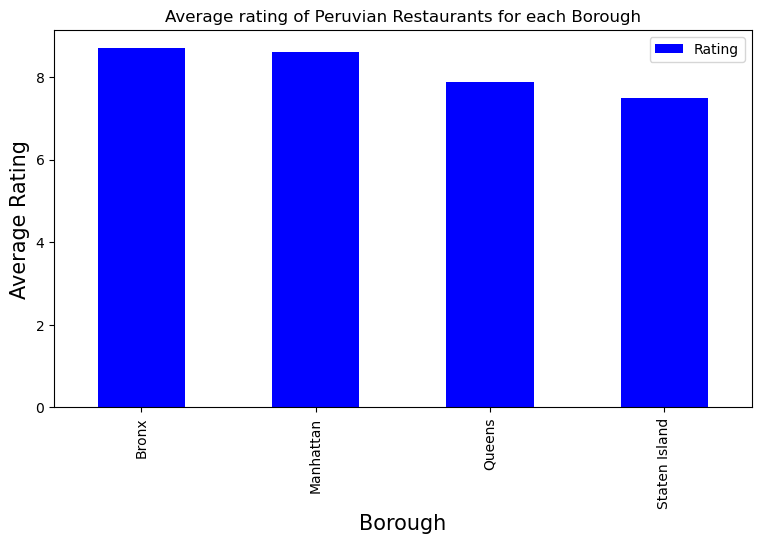

In [79]:
#Visualization

plt.figure(figsize=(9,5), dpi = 100)
plt.title('Average rating of Peruvian Restaurants for each Borough')
plt.xlabel('Borough', fontsize = 15)
plt.ylabel('Average Rating', fontsize=15)
peruvian_rest_stats_ny.groupby('Borough').mean()['Rating'].plot(kind='bar', color=clr)
plt.legend()
plt.show()

In [89]:
# Now let's consider the top neighborhoods with average rating higher that 8.0 for map visualization
ny_neighborhood_stats=ny_neighborhood_stats[ny_neighborhood_stats['Average Rating']>=8.0]
ny_neighborhood_stats

,Neighborhood,Average Rating
0,Clinton,8.9
2,Hunters Point,8.7
3,Jackson Heights,8.1
4,Little Neck,8.3
5,Mott Haven,8.7
9,Upper West Side,8.3


In [90]:
# Joining dataset to original New York data for longitude and latitude values
ny_neighborhood_stats=pd.merge(ny_neighborhood_stats,ny_data, on='Neighborhood')
ny_neighborhood_stats=ny_neighborhood_stats[['Borough','Neighborhood','Latitude','Longitude','Average Rating']]
ny_neighborhood_stats

,Borough,Neighborhood,Latitude,Longitude,Average Rating
0,Manhattan,Clinton,40.759101,-73.996119,8.9
1,Queens,Hunters Point,40.743414,-73.953868,8.7
2,Queens,Jackson Heights,40.751981,-73.882821,8.1
3,Queens,Little Neck,40.770826,-73.738898,8.3
4,Bronx,Mott Haven,40.806239,-73.916100,8.7
5,Manhattan,Upper West Side,40.787658,-73.977059,8.3


In [97]:
# Map creation
ny_map = folium.Map(location=geo_location('New York City'), zoom_start=12)
# instantiate a feature group for the ratings in the dataframe
rating = folium.map.FeatureGroup()

# loop through the ratings and add each to the neighborhood feature group
for lat, lng, in ny_neighborhood_stats[['Latitude','Longitude']].values:
    rating.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=10, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )
ny_map

In [98]:
#Adding a new field to dataframe for labeling purpose
ny_neighborhood_stats['Label']=ny_neighborhood_stats['Neighborhood']+', '+ny_neighborhood_stats['Borough']+'('+ny_neighborhood_stats['Average Rating'].map(str)+')'
# add pop-up text to each marker on the map
for lat, lng, label in ny_neighborhood_stats[['Latitude','Longitude','Label']].values:
    folium.Marker([lat, lng], popup=label).add_to(ny_map)        
# add ratings to map
ny_map.add_child(rating)

# Part 4 Results and Discussion

According to the analysis there are only 12 Peruvian restaurants in all New York City where Bronx borough is the top-rated followed by Manhattan borough, leaving the other boroughs far behind in the average rating. Queens borough has the most number of Peruvian restaurants by far in New York City.Clinton neighborhood located in Manhattan borough has the highest average rating in all New York City followed by Hunter Point and Mott Haven which with same average rating and located in in Queens and Bronx boroughs respectively. Pio Pio restaurant located in Clinton Neighborhood in Manhattan has the greatest number of likes, best rating, and tips among all Peruvian restaurants in New York City even though it has another restaurant in Bronx borough with high rating. 

Based on the above analysis Manhattan borough, specifically Clinton neighborhood, would be the best location in New York City to open a new Peruvian restaurant by analyzing and visualizing data. However, since Pio Pio restaurant is located in this neighborhood and being the most popular restaurant in terms of likes, best rating, and tips which is also located in the Bronx; I would suggest also looking to open and invest on new restaurant in other boroughs such as Brooklyn which there are no records of Peruvian restaurants.

Finally, it is important to take into consideration that more extensive analysis and more data is required for better decision-making since for purposes of this capstone project only Foursquare API was used to explore Peruvian restaurants New York City, excluding other external databases where other popular venues are registered such as in Yelp or Google Maps. Also, small and more traditional Peruvian Restauranrts might prefer no to announce their venues in local search-and-discovery mobile apps to keep themselves more local among their community. 

# Part 5 Conclusion 

This capstone project gave me a taste of what data scientists go through in real life situations when working with data and to learn about location data providers, such as Foursquare. Also, how to make API calls to the Foursquare API to retrieve data about venues, in this case Peruvian restaurants, in different neighborhoods around New York City. Furthermore, the capstone project allowed me to learn how to be creative in situations where data is not available by scraping web data and parsing HTML code. Lastly, how to utilize Python and its pandas library to manipulate data for exploring and analyzing data. 